# Downloading dataset from kaggle

In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 606M/612M [00:03<00:00, 46.9MB/s]
100% 612M/612M [00:03<00:00, 168MB/s] 


In [5]:
from zipfile import ZipFile

file_name = "gtsrb-german-traffic-sign.zip"

with ZipFile(file_name, "r") as zip:
    zip.extractall()
    print("DONE!")

DONE!


# Importing the modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

no_of_classes = 43
path = "Train"

 # Visualize the data

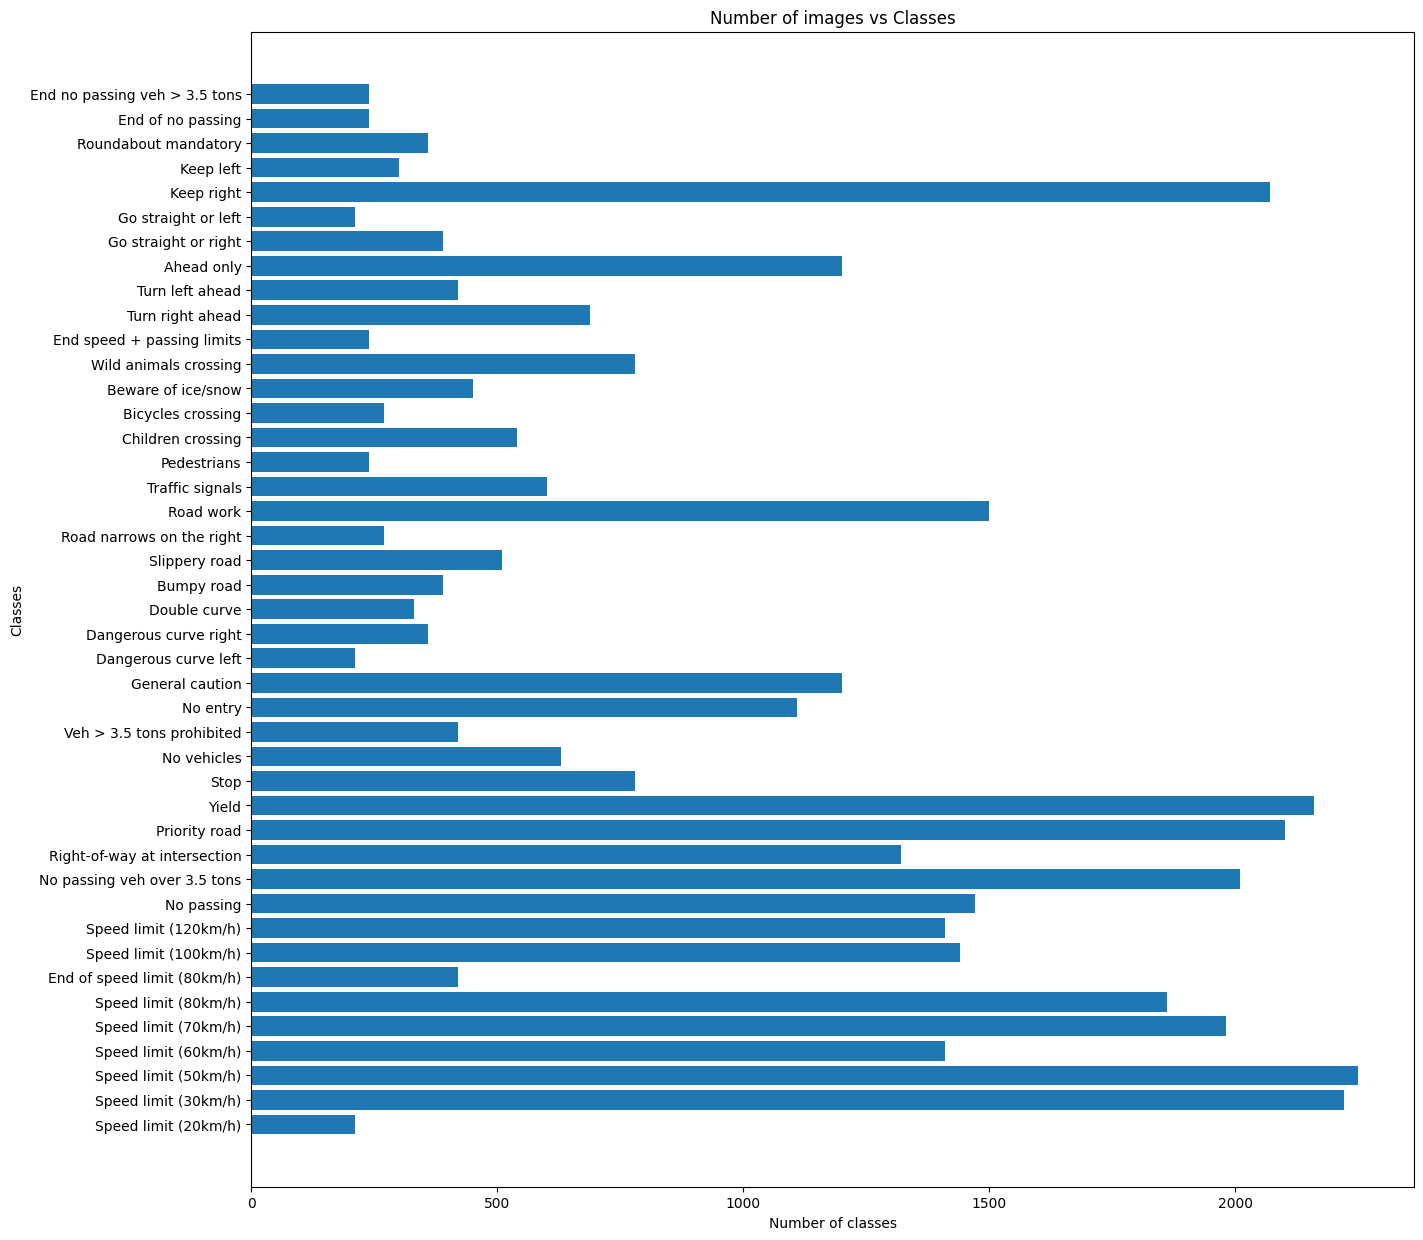

In [9]:
data = []

for i in range(no_of_classes):
    new_path = os.path.join(path, str(i))
    data.append([i, len([img for img in os.listdir(new_path)])])
data = np.array(data)
plt.figure(figsize=(15, 15))
plt.barh(np.arange(43), data[:, 1])
plt.yticks(np.arange(43), classes.values())
plt.title('Number of images vs Classes')
plt.ylabel('Classes')
plt.xlabel('Number of classes')
plt.show()

<class 'numpy.ndarray'>
(30, 30, 3)


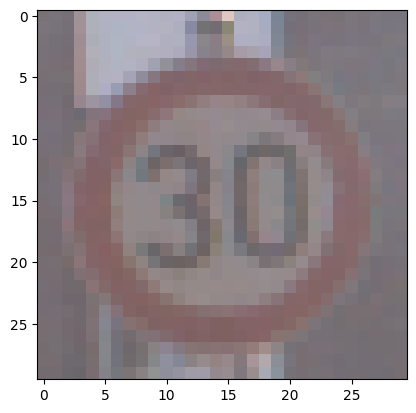

In [10]:
# Visualize a sample image from the dataset
img = cv2.imread("Train/1/00001_00000_00007.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (30, 30))
print(type(img))
print(img.shape)
plt.imshow(img)

# Variation of dimensions of the images of a class

In [11]:
new_path = os.path.join(path, str(1))
gx = []
gy = []

for img in os.listdir(new_path):
    res_img = cv2.imread(os.path.join(new_path, img))
    w, h, c = res_img.shape
    gx.append(w)
    gy.append(h)

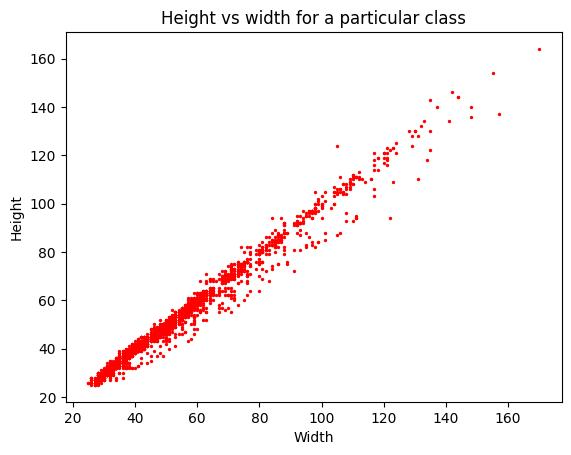

In [12]:
plt.scatter(gx, gy, color='red', s=2)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Height vs width for a particular class')
plt.show()

# Extraction of images using "OS" module

In [13]:
X = []
y = []

img_size = 30

for i in range(no_of_classes):
    new_path = os.path.join(path, str(i))
    for img in tqdm(os.listdir(new_path)):
        res_img = cv2.imread(os.path.join(new_path, img))
        res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
        new_img = cv2.resize(res_img, (img_size, img_size))

        X.append(new_img)
        y.append(i)

100%|██████████| 240/240 [00:00<00:00, 7588.47it/s]


In [14]:
X = np.array(X)
X = X / 255.0
y = np.array(y)

print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of X:  (39209, 30, 30, 3)
shape of y:  (39209,)


# Randomize the data

In [15]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)
y = to_categorical(y)

# Splitting the data into train and validation set

In [16]:
n = len(X)
k = (int)(0.2 * n)
X_train, X_val = X[k:], X[:k]
y_train, y_val = y[k:], y[:k]

print("shape of X_train, X_val: ", X_train.shape, X_val.shape)
print("shape of y: ", y_train.shape, y_val.shape)

shape of X_train, X_val:  (31368, 30, 30, 3) (7841, 30, 30, 3)
shape of y:  (31368, 43) (7841, 43)


# Building the model

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(43, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model summary

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,523 (2.37 MB)

 Trainable params: 620,523 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

# Fitting the model

In [19]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.4477 - loss: 2.0110 - val_accuracy: 0.9500 - val_loss: 0.1966
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9303 - loss: 0.2456 - val_accuracy: 0.9744 - val_loss: 0.1023
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9602 - loss: 0.1316 - val_accuracy: 0.9774 - val_loss: 0.0774
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9723 - loss: 0.0936 - val_accuracy: 0.9824 - val_loss: 0.0598
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9783 - loss: 0.0689 - val_accuracy: 0.9884 - val_loss: 0.0428
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9815 - loss: 0.0595 - val_accuracy: 0.9912 - val_loss: 0.0403
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9916 - val_loss: 0.0312
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9884 - loss: 0.0369 - val_accuracy: 0

# Plotting the accuracy and loss curve

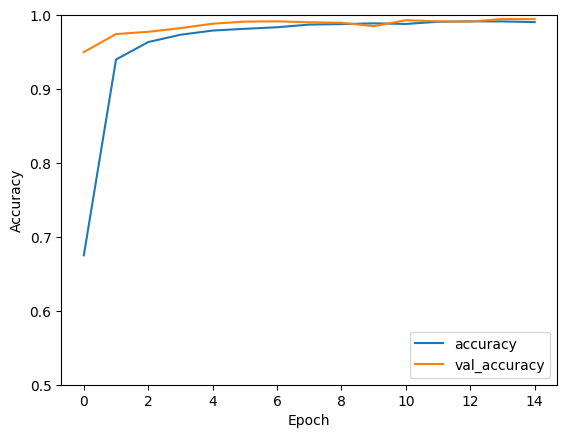

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

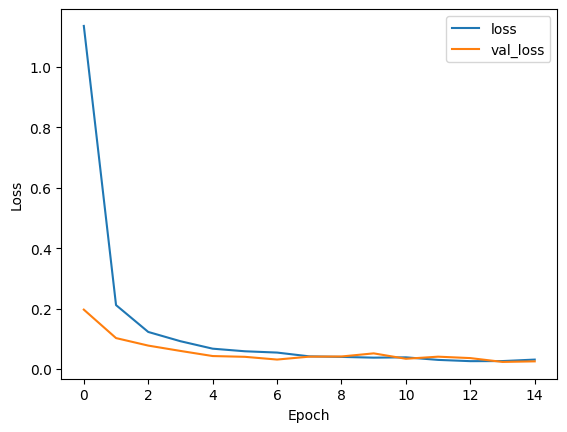

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Evaluating the test data.

In [22]:
data = pd.read_csv("Test.csv")

X_test = []
y_test = []

for i in range(len(data)):
    res_img = cv2.imread(data.iloc[i, -1])
    res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)
    new_img = cv2.resize(res_img, (img_size, img_size))

    X_test.append(new_img)
    y_test.append(data.iloc[i, -2])

X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

General caution


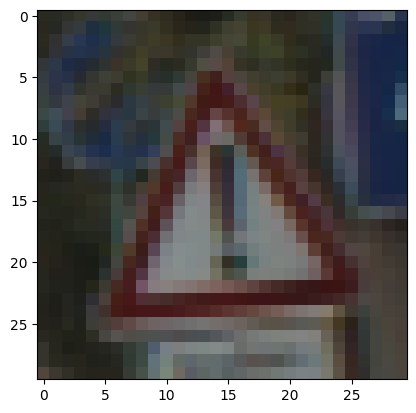

In [23]:
idx = 1412
plt.imshow(X_test[idx])
print(classes[y_test[idx]])

In [24]:
y_test = to_categorical(y_test)
val_loss, val_acc = model.evaluate(X_test, y_test)

print("Loss: ", val_loss)
print("Accuracy: ", val_acc)

y_pred = model.predict(X_test)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9514 - loss: 0.2945
Loss:  0.33068421483039856
Accuracy:  0.9484560489654541
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Predicting a test image

The model predicted :  Keep right


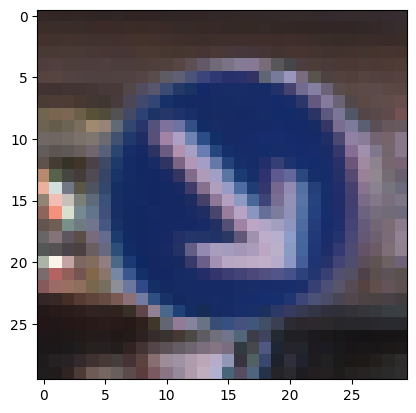

In [25]:
print("The model predicted : ", classes[np.argmax(y_pred[2])])
plt.imshow(X_test[2])

In [29]:
import h5py

model.save("Traffic_Sign_Recognition_Model.keras")